<a href="https://colab.research.google.com/github/RiturajSaha/App-Review-Analyzer/blob/main/Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Review Analysis'

/content/drive/MyDrive/Colab Notebooks/Review Analysis


Importing the Libraries

In [ ]:
!pip install google-play-scraper
from google_play_scraper import app, reviews, Sort
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import pickle
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Defining required Functions

In [ ]:
def getDetails(url):
  app_id=url.split('?')[1].split('&')[0][3:]
  app_attr=app(app_id)
  print('NAME:',app_attr['title'],
      '\nAPP ID:',app_id,
      '\nRATING:',app_attr['score'],
      '\nTOTAL RATINGS:',app_attr['ratings'],
      '\nTOTAL REVIEWS:',app_attr['reviews'],
      '\nREVIEWS ANALYZED:',r)

  
def getReviews(url,n=10):
  global r
  r=n
  app_id=url.split('?')[1].split('&')[0][3:]
  app_reviews = reviews(app_id, country='us',
                        sort=Sort.MOST_RELEVANT,count=n)
  app_attr=app(app_id)
  df = pd.DataFrame(app_reviews[0]).iloc[:,3:5]
  df.rename(columns = {'content':'REVIEW', 
                       'score':'RATING'}, inplace = True)
  display(df)
  return(df)


def cleanDf(df,col):
  reviews=[]
  for row in df[col]:
     row=re.sub('[^a-z]', ' ', row.lower())
     stopWords = nltk.corpus.stopwords.words('english')
     stopWords.remove('not')
     row=row.split()
     row = [nltk.stem.porter.PorterStemmer().stem(word) for word in row if not word in set(stopWords)]
     row = ' '.join(row)
     reviews.append(row)
  df[col]=reviews
  return df
  

def bagOfWords(x):
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer(max_features=13500)
  x = cv.fit_transform(x).toarray()
  n=len(x[0])
  l=[]
  for i in x:
      l.append(list(i)+[0 for i in range(13500-n)])
  del x    
  return(np.array(l))


def getVisualizations(df):  
  x =df['SENTIMENT'];y =df['RATING']
  plt.yticks(np.arange(1,6,1))  
  plt.xlabel("Sentiments",size=15)
  plt.ylabel("Ratings",size=15)
  plt.bar(x, y)
  plt.grid(axis='y')
  plt.show()
  print('\n')
  data = df['SENTIMENT'].value_counts()
  x = list(data);y = list(data.index)
  circle=plt.Circle( (0,0), 0.7, color='white')
  plt.gcf().gca().add_artist(circle)
  plt.pie(x,autopct='%1.0f%%')
  plt.title("Sentiment Analysis",size=15,loc='left')
  plt.legend(labels=y,bbox_to_anchor=(1, 0.8))
  plt.show()
  print('\n')
  data = df['RATING'].value_counts()
  x = list(data);y = list(data.index)
  plt.pie(x,autopct='%1.0f%%')
  plt.title("Rating Analysis",size=15,loc='left')
  plt.legend(labels=y,bbox_to_anchor=(1, .8))
  plt.show()


def getInsights(df):
  c32=df.loc[(df['RATING'] >=3) & (df['SENTIMENT'] == 2)].shape[0]
  c31=df.loc[(df['RATING'] >=3) & (df['SENTIMENT'] == 1)].shape[0]
  c30=df.loc[(df['RATING'] >=3) & (df['SENTIMENT'] == 0)].shape[0]
  t=int(df.shape[0])

  print(c32*100//t,'% of the Positive reviews have ratings greater than 2')
  print(c31*100//t,'% of the Neutral reviews have ratings greater than 2')
  print(c30*100//t,'% of the Negative reviews have ratings greater than 2')


Extracting the Dataset then Cleaning and Processing the Dataframe

In [ ]:
# twitter
url='https://play.google.com/store/apps/details?id=com.twitter.android&hl=en_IN&gl=US'
df=getReviews(url,25)
df2=df.copy(deep=True)
df=cleanDf(df,'REVIEW')

,REVIEW,RATING
0,"honestly this app just keeps getting worse, an...",2
1,I've been having problems with getting my main...,3
2,"I enjoy using Twitter, but this last month it ...",3
3,"Meeting those that keep your head up high, eve...",5
4,"They seem determined to make this unusable, no...",1
5,Nearly unusable if you are trying to catch up ...,1
6,"Twitter Spaces crashes from time to time, I'm ...",3
7,I have two problems and both are linked togeth...,3
8,I cannot post anything right now.... what is g...,2
9,If not for the random freezes it would be a 5....,4


Loading the model

In [ ]:
model = pickle.load(open('model.pkl','rb'))

Applying Bag Of Words model to the REVIEW column

In [ ]:
reviews=bagOfWords(df['REVIEW'])
sentiments=model.predict(reviews)

Cleaning the processed Dataframe

In [ ]:
df['SENTIMENT']=df2['SENTIMENT']=sentiments
df2['SENTIMENT'].replace({0: 'Negative', 
                                  1: 'Neutral', 
                                  2: 'Positive'}, inplace=True)

Disolaying the overall Output generated

In [ ]:
getDetails(url)
display(df2)

NAME: Twitter 
APP ID: com.twitter.android 
RATING: 3.6492321 
TOTAL RATINGS: 19371619 
TOTAL REVIEWS: 665153 
REVIEWS ANALYZED: 25


,REVIEW,RATING,SENTIMENT
0,"honestly this app just keeps getting worse, an...",2,Negative
1,I've been having problems with getting my main...,3,Neutral
2,"I enjoy using Twitter, but this last month it ...",3,Neutral
3,"Meeting those that keep your head up high, eve...",5,Positive
4,"They seem determined to make this unusable, no...",1,Neutral
5,Nearly unusable if you are trying to catch up ...,1,Neutral
6,"Twitter Spaces crashes from time to time, I'm ...",3,Neutral
7,I have two problems and both are linked togeth...,3,Negative
8,I cannot post anything right now.... what is g...,2,Positive
9,If not for the random freezes it would be a 5....,4,Neutral


Depicting Visualizations

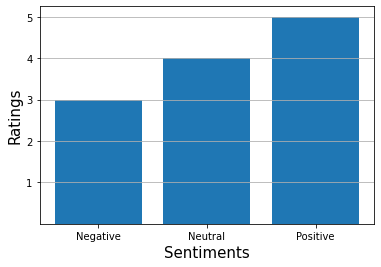

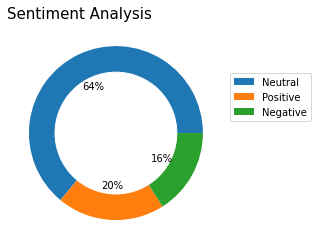

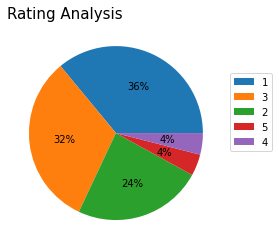

In [ ]:
getVisualizations(df2)

Generating Insights

In [ ]:
getInsights(df)

4 % of the Positive reviews have ratings greater than 2
28 % of the Neutral reviews have ratings greater than 2
8 % of the Negative reviews have ratings greater than 2
